In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Load the data

In [5]:
house_df = pd.read_csv('california house prices.csv')
house_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


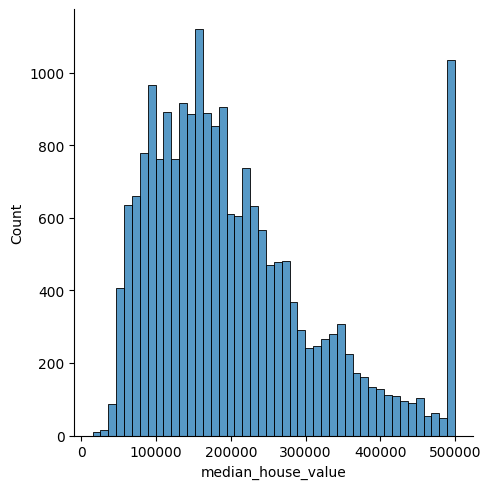

In [6]:
sns.displot(x = house_df['median_house_value'], data=house_df)

In [7]:
house_df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [8]:
# map the categorical data
house_df['ocean_proximity'] = house_df['ocean_proximity'].map({'NEAR BAY': 0, '<1H OCEAN': 1, 'INLAND': 2,  'NEAR OCEAN': 3, 'ISLAND': 4})

In [9]:
def summary(text, df):
    print(f'{text} shape: {df.shape}')
    summ = pd.DataFrame(df.dtypes, columns=['dtypes'])
    summ['null'] = df.isnull().sum()
    summ['unique'] = df.nunique()
    summ['min'] = df.min()
    summ['median'] = df.median()
    summ['max'] = df.max()
    summ['mean'] = df.mean()
    summ['std'] = df.std()
    return summ

summary('house_dataframe',house_df)

house_dataframe shape: (20640, 10)


,dtypes,null,unique,min,median,max,mean,std
longitude,float64,0,844,-124.3500,-118.4900,-114.3100,-119.569704,2.003532
latitude,float64,0,862,32.5400,34.2600,41.9500,35.631861,2.135952
housing_median_age,int64,0,52,1.0000,29.0000,52.0000,28.639486,12.585558
total_rooms,int64,0,5926,2.0000,2127.0000,39320.0000,2635.763081,2181.615252
total_bedrooms,float64,207,1923,1.0000,435.0000,6445.0000,537.870553,421.385070
population,int64,0,3888,3.0000,1166.0000,35682.0000,1425.476744,1132.462122
households,int64,0,1815,1.0000,409.0000,6082.0000,499.539680,382.329753
median_income,float64,0,12928,0.4999,3.5348,15.0001,3.870671,1.899822
ocean_proximity,int64,0,5,0.0000,1.0000,4.0000,1.464729,0.854226
median_house_value,int64,0,3842,14999.0000,179700.0000,500001.0000,206855.816909,115395.615874


## Missing values

In [17]:
# fill the null values in the total_bedrooms col with the mean value
house_df['total_bedrooms'].fillna(house_df['total_bedrooms'].mean(), inplace=True)

In [18]:
summary('house_dataframe',house_df)

house_dataframe shape: (20640, 10)


,dtypes,null,unique,min,median,max,mean,std
longitude,float64,0,844,-124.3500,-118.4900,-114.3100,-119.569704,2.003532
latitude,float64,0,862,32.5400,34.2600,41.9500,35.631861,2.135952
housing_median_age,int64,0,52,1.0000,29.0000,52.0000,28.639486,12.585558
total_rooms,int64,0,5926,2.0000,2127.0000,39320.0000,2635.763081,2181.615252
total_bedrooms,float64,0,1924,1.0000,438.0000,6445.0000,537.870553,419.266592
population,int64,0,3888,3.0000,1166.0000,35682.0000,1425.476744,1132.462122
households,int64,0,1815,1.0000,409.0000,6082.0000,499.539680,382.329753
median_income,float64,0,12928,0.4999,3.5348,15.0001,3.870671,1.899822
ocean_proximity,int64,0,5,0.0000,1.0000,4.0000,1.464729,0.854226
median_house_value,int64,0,3842,14999.0000,179700.0000,500001.0000,206855.816909,115395.615874


No more missing values

## Checking outliers

In [12]:
house_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,1.464729,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,419.266592,1132.462122,382.329753,1.899822,0.854226,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,0.000000,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,1.000000,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,438.000000,1166.000000,409.000000,3.534800,1.000000,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,2.000000,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,4.000000,500001.000000


I dont think there are outliers

## Get inputs and targets

In [19]:
input_data = house_df.iloc[:, :len(house_df.columns)-1]
target_data = house_df['median_house_value']

## Checking linearity

In [21]:
# drop the ocean_proximity because it is a categorical data
input_cols = input_data.columns.drop(['ocean_proximity'])
len(input_cols)

8

In [22]:
# plot the data by scatter plot
    # input_df: input data farme
    # y: target
    # input_cols: a list with input columns
    
def plot(input_df, y, input_cols):
    for i in input_cols:
        x = input_df[i]
        plt.figure(figsize=(5,3))
        plt.scatter(x, y)
        plt.xlabel(x.name)
        plt.ylabel(y.name)
        plt.show()

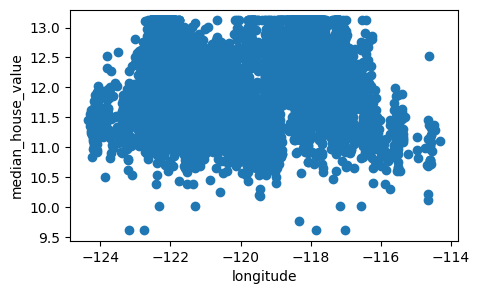

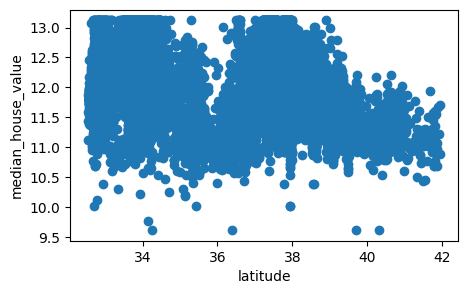

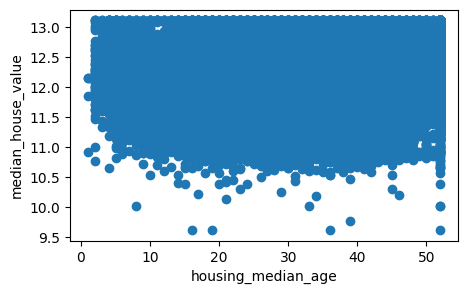

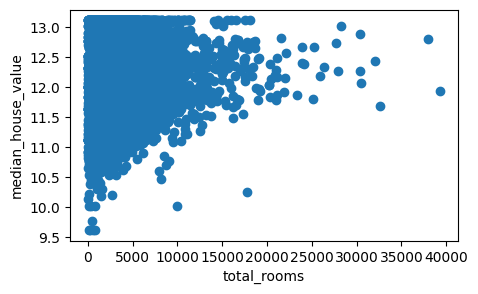

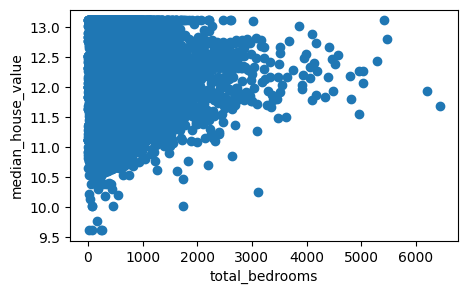

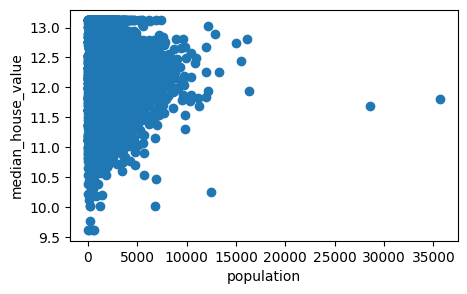

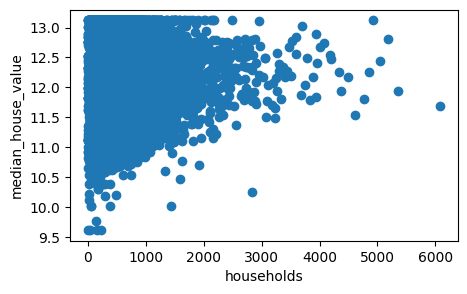

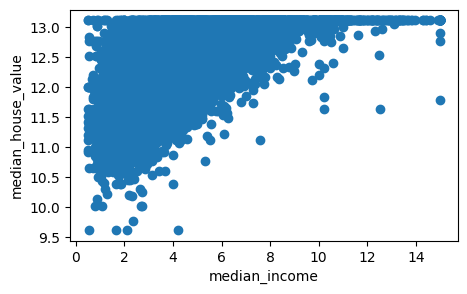

In [23]:
# pass the data to the plot function
plot(input_data, np.log(target_data), input_cols)

#### Most of them are not linear and the best data for the prediction of the price is (myb) median_income in the linear regression model

## Mutillinearity

In [25]:
# calculate the variance inflation factor to check if each independent input variable is correlated
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [26]:
vif = [variance_inflation_factor(input_data.values, i) for i in range(input_data.shape[1])]
vif_df = pd.DataFrame({'Features': input_data.columns, 'VIF': vif})
vif_df

,Features,VIF
0,longitude,648.376219
1,latitude,557.061245
2,housing_median_age,7.648862
3,total_rooms,29.537512
4,total_bedrooms,71.905775
5,population,16.194319
6,households,74.769424
7,median_income,8.347940
8,ocean_proximity,4.296115


<Axes: >

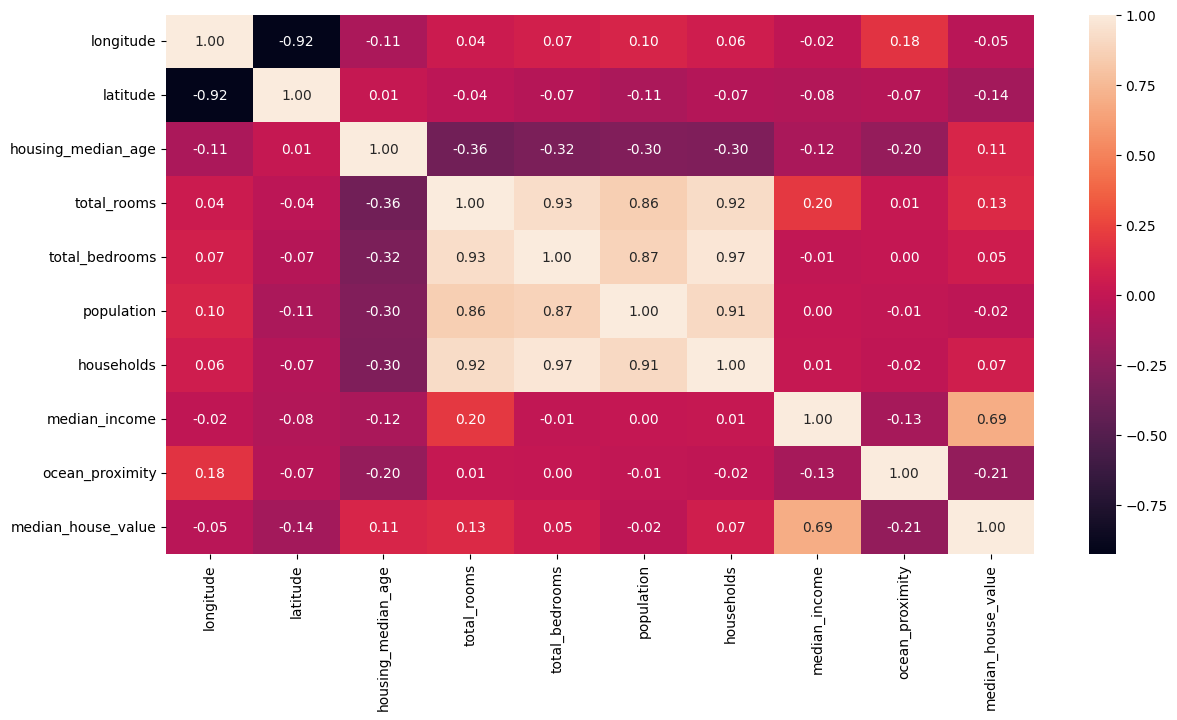

In [27]:
plt.figure(figsize=(14,7))
sns.heatmap(house_df.corr(), annot=True, fmt='.2f',)

#### Total rooms are exclused from total bedrooms, so I don't need to drop it but I can drop households or popluation because households can potentialy represent popluation in that block vice versa. Also, based on the correlation matrix and VIF results, I would first remove 'households' due to its high correlation with 'total_bedrooms' and 'population'.

In [28]:
# drop the population
input_data = input_data.drop(['households'], axis=1)

In [29]:
vif = [variance_inflation_factor(input_data.values, i) for i in range(input_data.shape[1])]
vif_df = pd.DataFrame({'Features': input_data.columns, 'VIF': vif})
vif_df

,Features,VIF
0,longitude,648.327296
1,latitude,557.038765
2,housing_median_age,7.622845
3,total_rooms,29.526269
4,total_bedrooms,29.216014
5,population,12.369313
6,median_income,8.318237
7,ocean_proximity,4.273802


## Feature selection

In [39]:
# calculate the p-values to find out the impact of each variable on the model
from sklearn.feature_selection import f_regression
p_values = f_regression(input_data, target_data) 
p_values = p_values[1].round(3)
P_values_table = pd.DataFrame({'Features': input_data.columns, 'P_values': p_values})
P_values_table

,Features,P_values
0,longitude,0.0
1,latitude,0.0
2,housing_median_age,0.0
3,total_rooms,0.0
4,total_bedrooms,0.0
5,population,0.0
6,median_income,0.0
7,ocean_proximity,0.0


#### The lower the p value a feature has, the greater effect on the model

In [40]:
# so we ain't deleting anything

## Normalization

In [41]:
from sklearn.preprocessing import StandardScaler

In [42]:
# scale the data 
scale = StandardScaler()
scale.fit(input_data)

scaled_input_data = scale.transform(input_data)
scaled_input_data

array([[-1.32783522,  1.05254828,  0.98214266, ..., -0.9744286 ,
         2.34476576, -1.71472665],
       [-1.32284391,  1.04318455, -0.60701891, ...,  0.86143887,
         2.33223796, -1.71472665],
       [-1.33282653,  1.03850269,  1.85618152, ..., -0.82077735,
         1.7826994 , -1.71472665],
       ...,
       [-0.8237132 ,  1.77823747, -0.92485123, ..., -0.3695372 ,
        -1.14259331,  0.62663072],
       [-0.87362627,  1.77823747, -0.84539315, ..., -0.60442933,
        -1.05458292,  0.62663072],
       [-0.83369581,  1.75014627, -1.00430931, ..., -0.03397701,
        -0.78012947,  0.62663072]])

## Split data

In [49]:
from sklearn.model_selection import train_test_split

# Podela na trening skup i privremeni skup
train_input, temp_input, train_target, temp_target = train_test_split(input_data, target_data, test_size=0.2, random_state=42)

# Podela privremenog skupa na validacijski i testni skup
validation_input, test_input, validation_target, test_target = train_test_split(temp_input, temp_target, test_size=0.5, random_state=42)

## Save them into npz

In [50]:
np.savez('train_data', inputs=train_input, targets=train_target)
np.savez('validation_data', inputs=validation_input, targets=validation_target)
np.savez('test_data', inputs=test_input, targets=test_target)